In [186]:
# https://www.kaggle.com/competitions/playground-series-s4e1/leaderboard
# Username:  the-usman
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [187]:
%time

OnPc = True
path = '/kaggle/input/playground-series-s4e1/train.csv' if not OnPc else 'data/train.csv'

train_df = pd.read_csv(path, index_col=[0])


CPU times: total: 0 ns
Wall time: 0 ns


In [188]:
train_df.sample(10)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
130387,15677087,O'Brien,558,France,Male,31.0,5,0.00,2,1.0,0.0,147569.57,0
18116,15708003,Chukwudi,558,Germany,Female,29.0,9,132287.92,1,0.0,1.0,62852.84,0
111391,15766185,She,850,Germany,Male,31.0,7,146587.30,1,1.0,1.0,89874.82,0
98963,15694518,Uchechukwu,596,France,Male,29.0,7,0.00,1,1.0,0.0,143535.24,1
136031,15583580,Chiang,792,Germany,Male,38.0,3,161807.18,2,1.0,1.0,180840.74,0
75069,15612478,Ibezimako,565,Germany,Male,34.0,4,132623.60,2,0.0,0.0,101102.39,0
110178,15687913,Walker,683,France,Female,34.0,4,0.00,2,1.0,0.0,86619.77,0
27648,15695078,Atkins,654,Spain,Female,27.0,10,0.00,2,1.0,0.0,136983.77,0
143403,15697310,Y?an,691,France,Male,38.0,2,0.00,2,1.0,0.0,94944.55,0


In [189]:
train_df.shape

(165034, 13)

In [190]:
train_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [191]:
train_df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
def SingleColumnEDA(data, target) :
    
    plt.figure(figsize=(14,8))
    num_col = data.select_dtypes(np.number).columns.tolist()
    num_col = num_col[1: ]
    additional_cols = ["NumOfProducts", "HasCrCard", "IsActiveMember", "Exited", "Tenure"]

    num_col = [col for col in num_col if col not in additional_cols]
    cat_col = data.select_dtypes("object").columns.tolist()
    cat_col = cat_col[1:]
    
    cat_col.extend(additional_cols)
    
    print(cat_col)
    for col in num_col :
        plt.figure(figsize=(14,8))
        plt.subplot(1,2,1)
        plt.title(f"Histogram of {col}")
        sns.histplot(x=data[col], hue=data[target], kde=True)
        plt.subplot(1,2,2)
        plt.title(f"Boxplot of {col}")
        sns.boxplot(data[col])
        plt.tight_layout()
        plt.show()
    
    for col in cat_col :
        plt.figure(figsize=(14, 8))
        plt.subplot(1,2,1)
        plt.title(f"Count plot of {col}")
        sns.countplot(x=data[col], hue=data[target])
        plt.subplot(1,2,2)
        plt.title(f"Pie plot of {col}")
        plt.pie(x=data[col].value_counts().values, labels=data[col].value_counts().index, autopct = '%.2f%%' )
        plt.tight_layout()
        plt.show()

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Tenure']


<Figure size 1400x800 with 0 Axes>

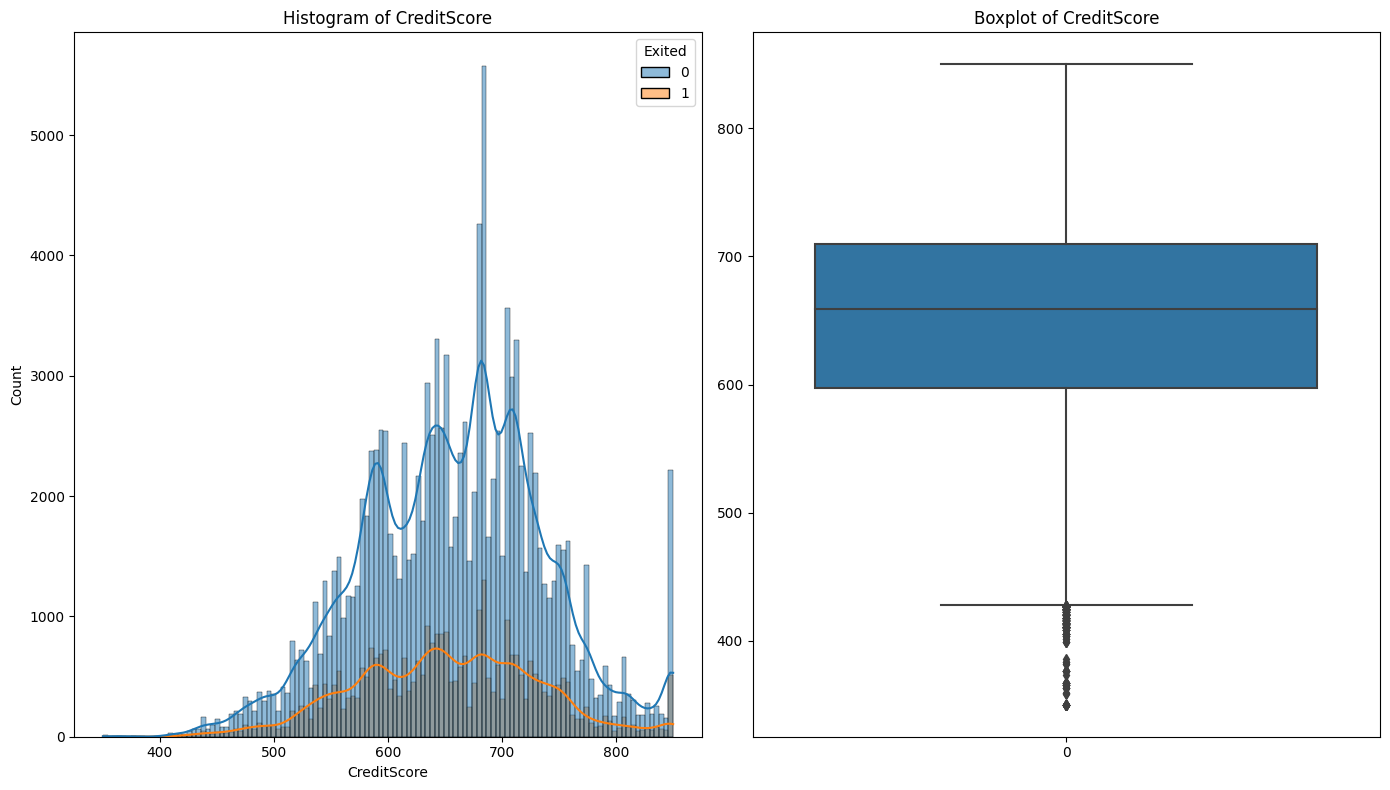

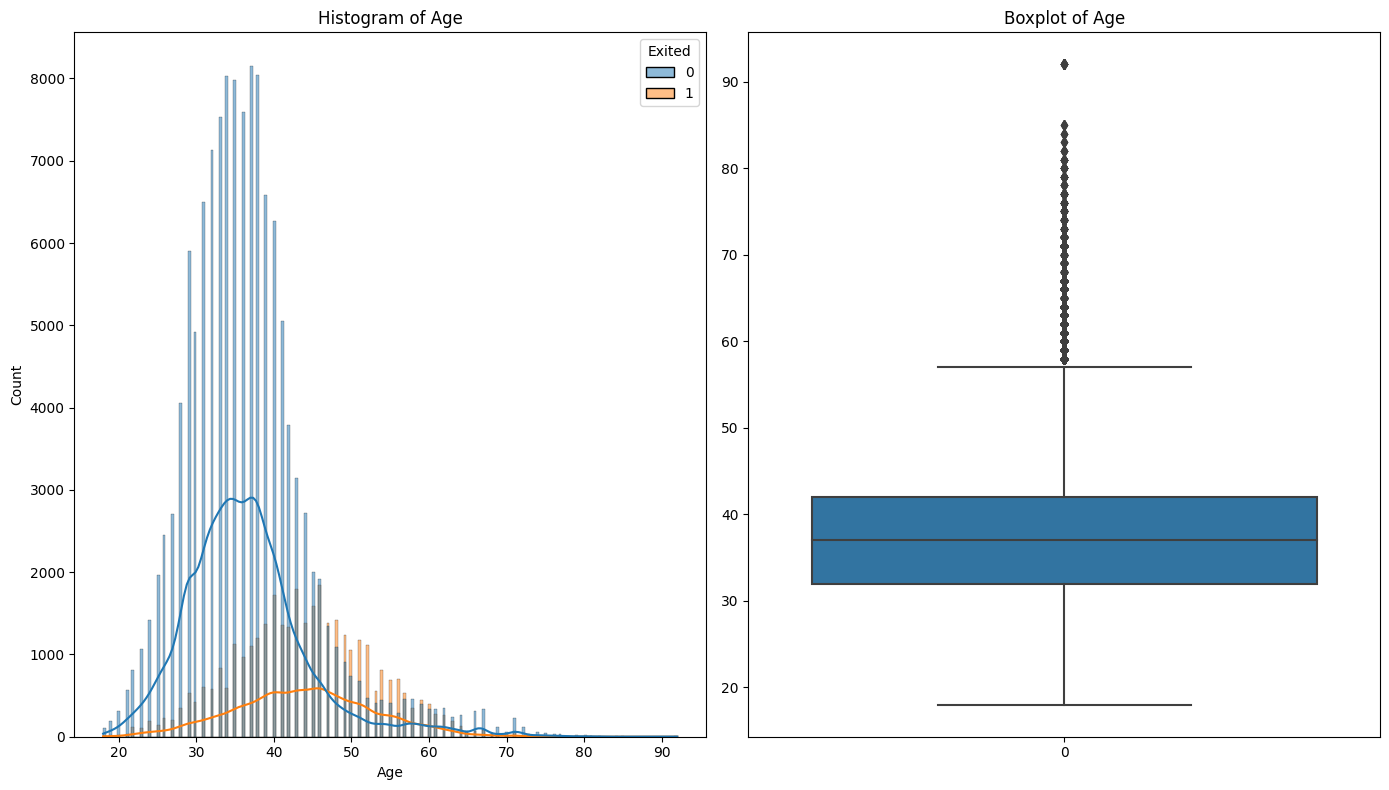

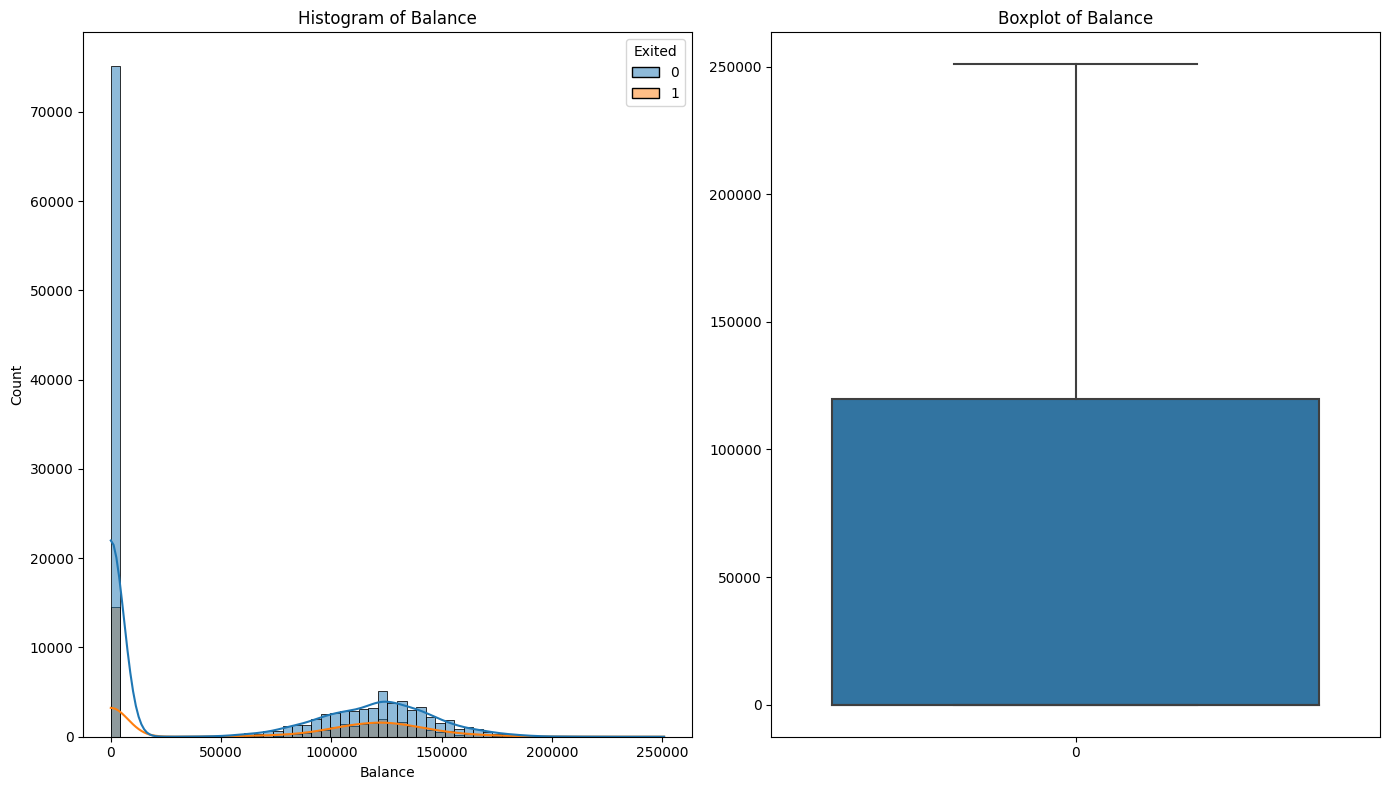

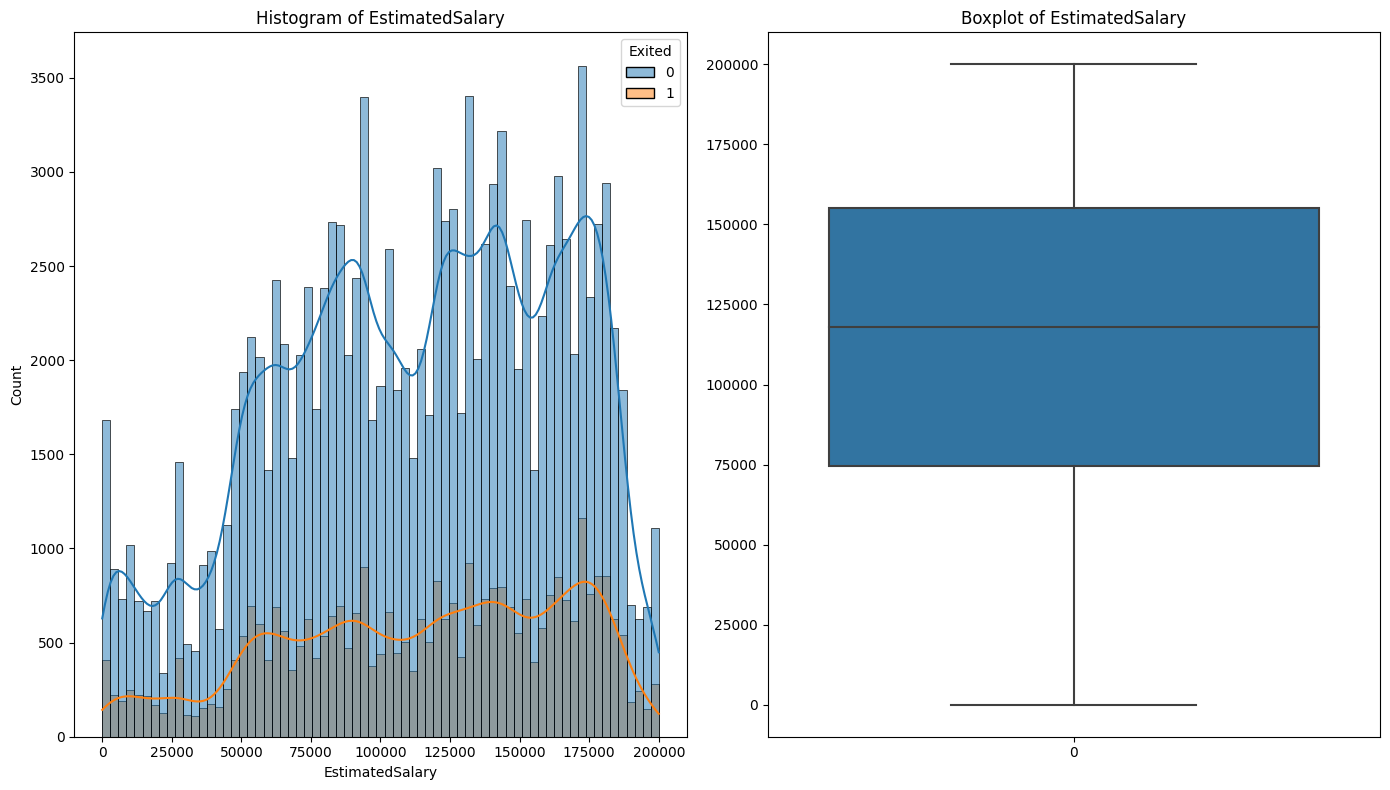

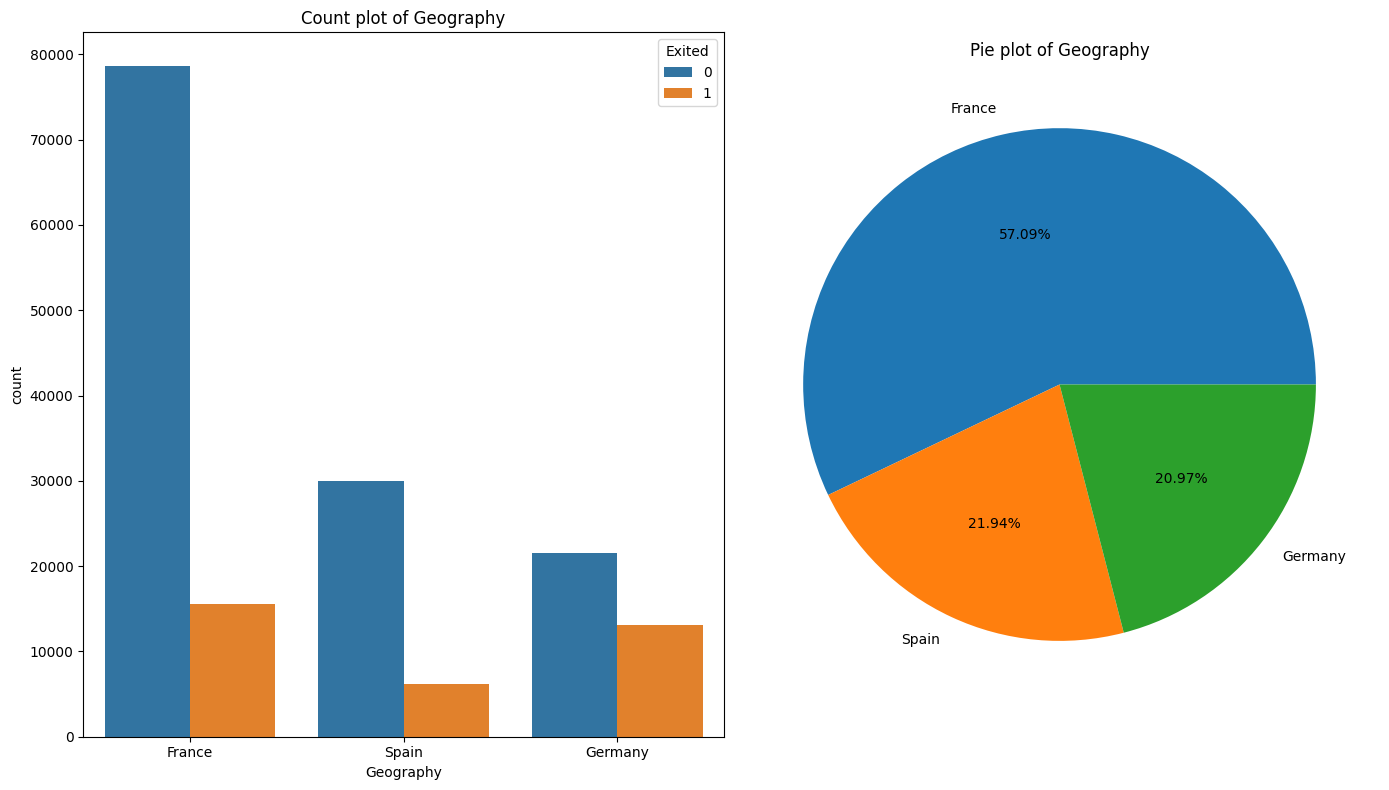

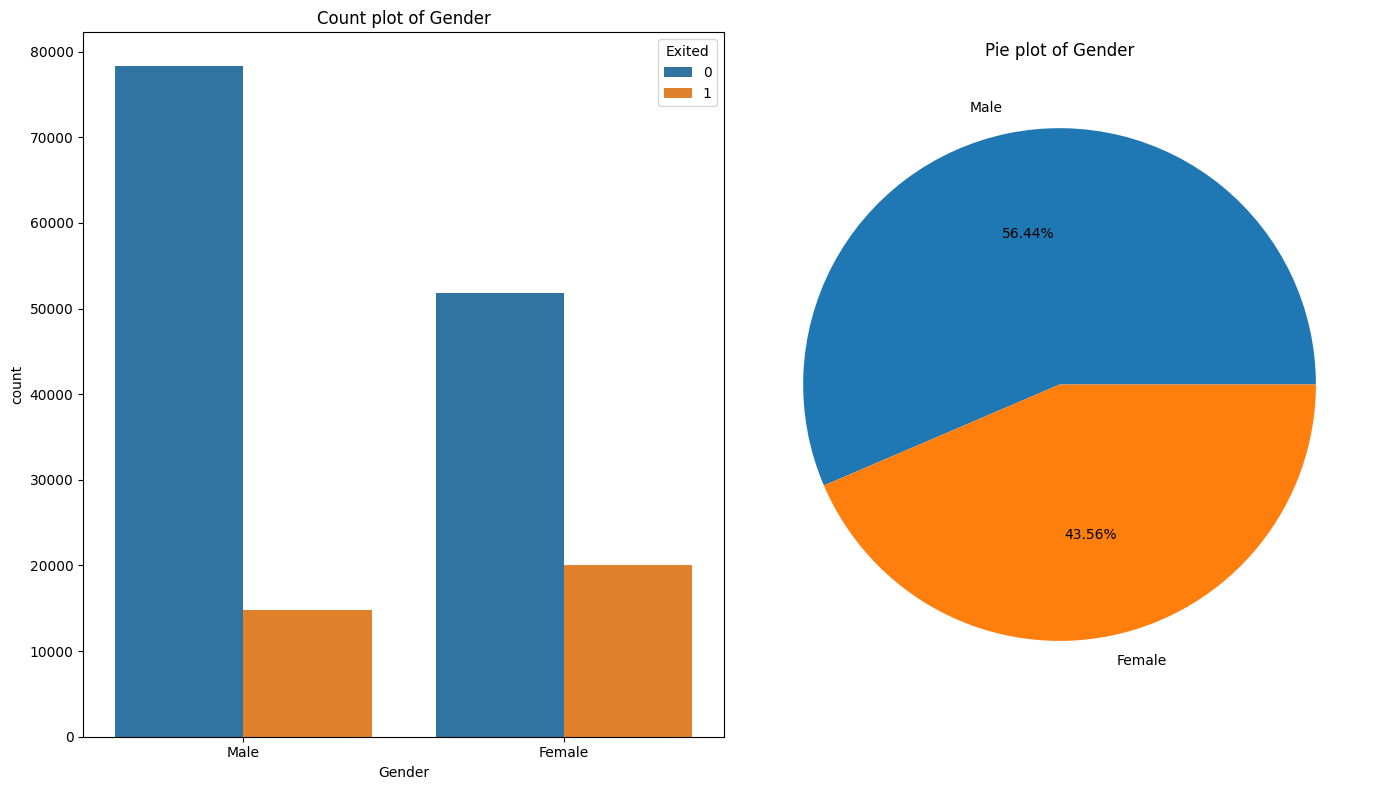

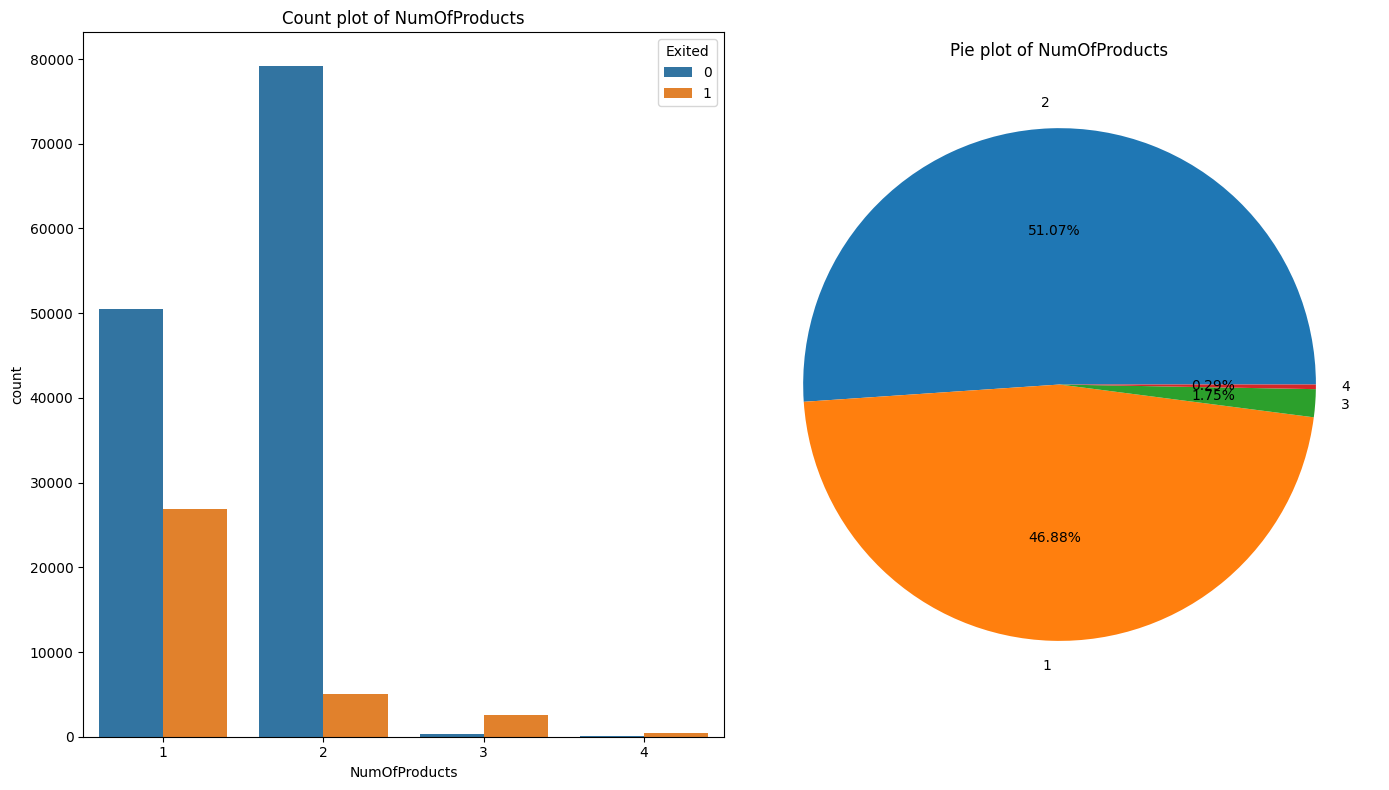

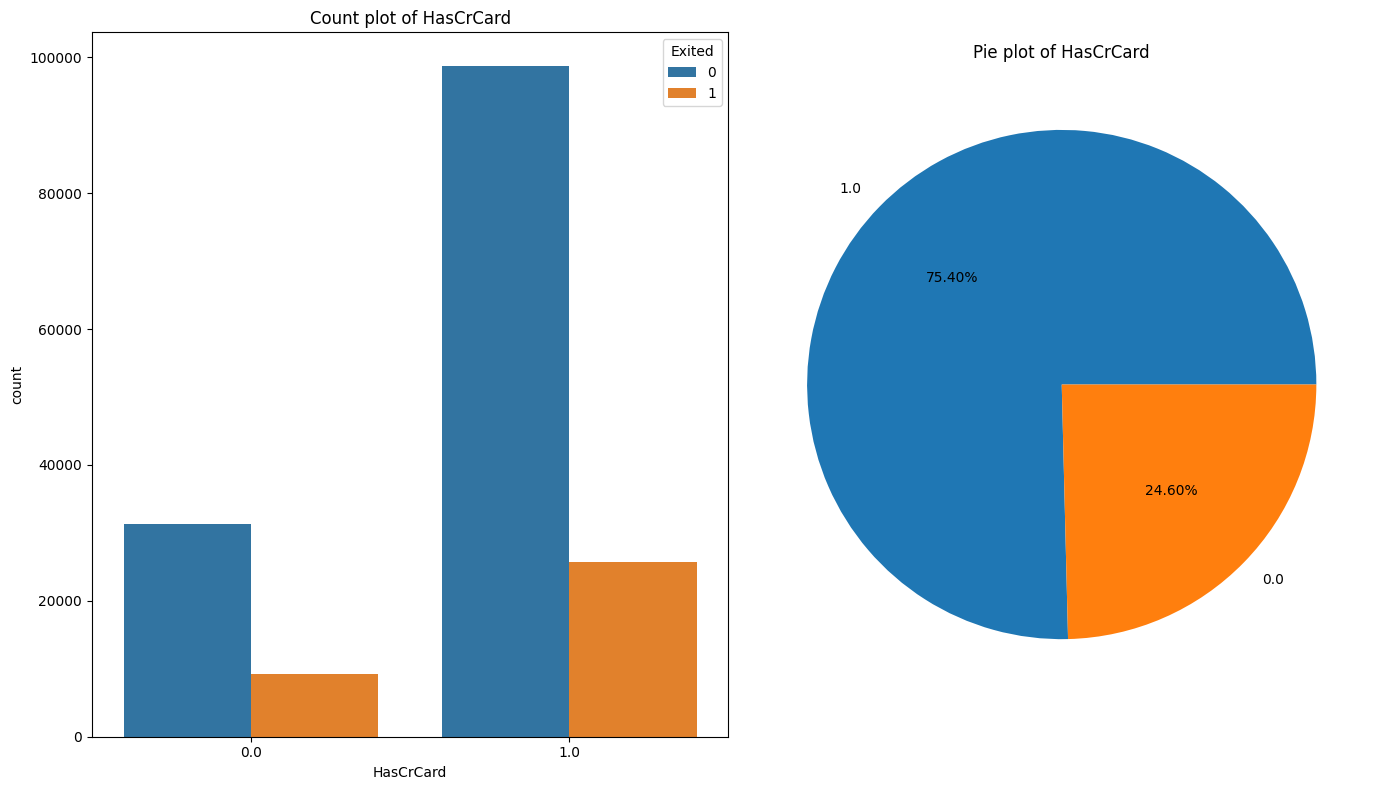

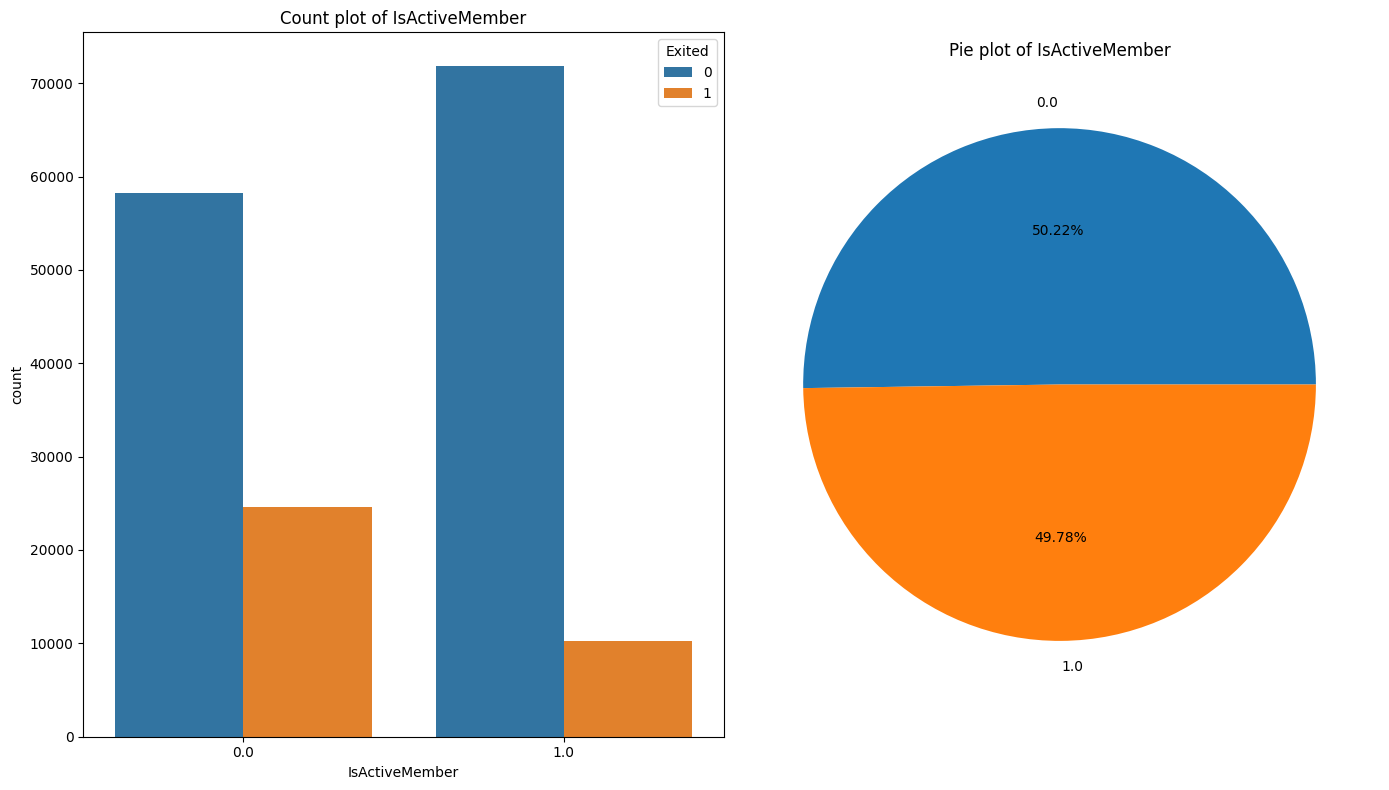

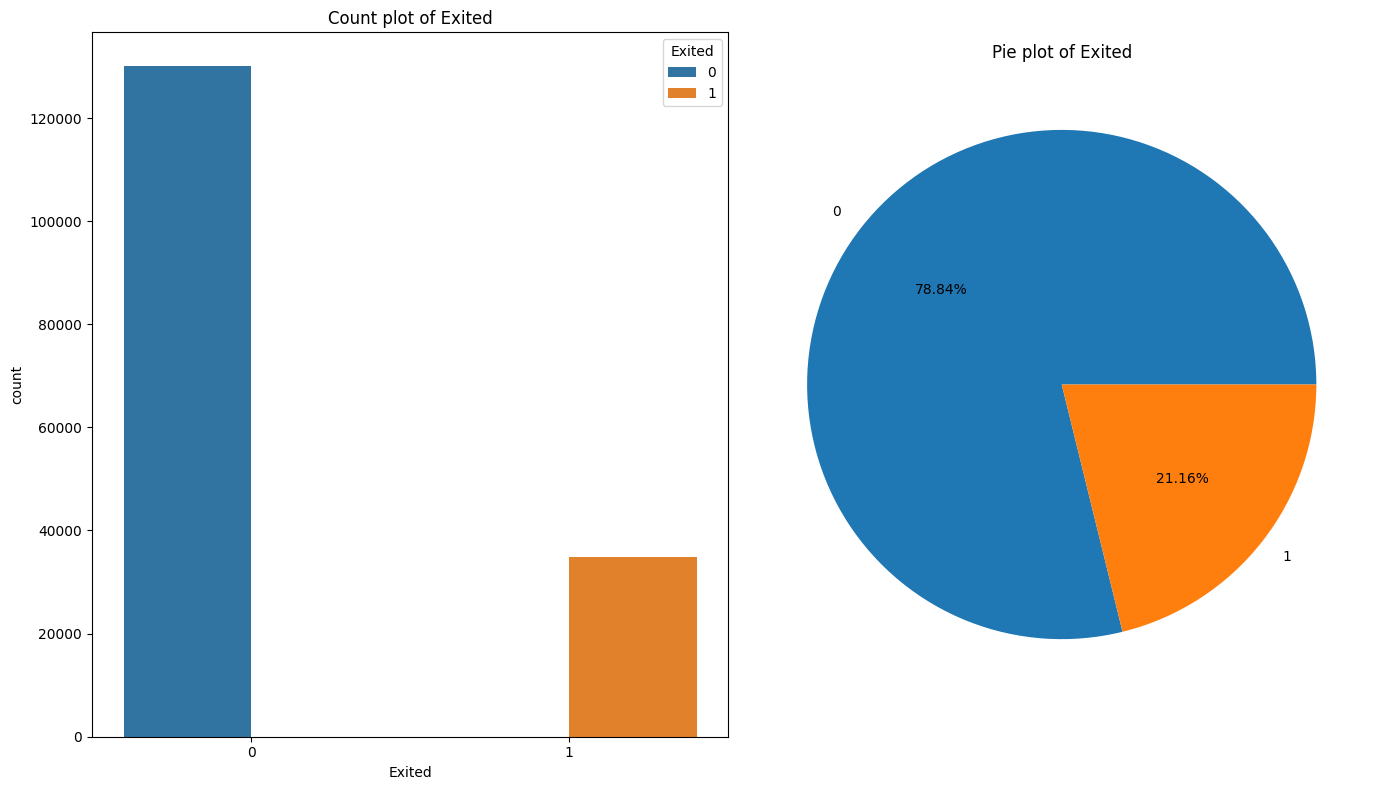

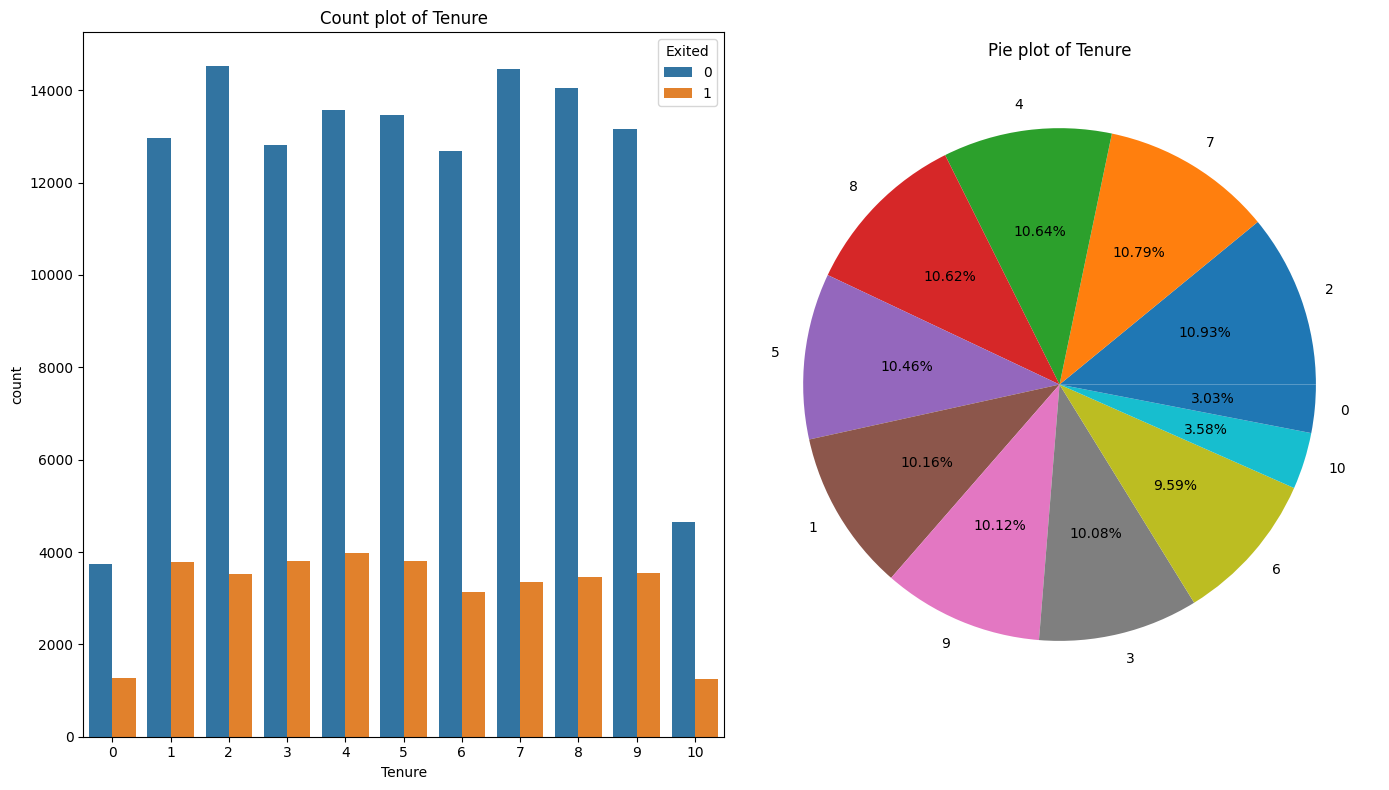

In [194]:
SingleColumnEDA(train_df, 'Exited')

# Question that Raised
1. Why the ratio of female customer to leave bank is more the men?
2. Why from germany churn rate is more

# Outcome from data
* The ratio to leave bank above 45 age is more
* Most of Customers has Zero balance approximately 50%
* Data of Cutomer Balance is highly left skew
* Distribution of Salary is sort of uniform
* The Customer who is not active they more likely to leave which make sense
* The people has 2 product are use less likely to leave

# Check Multicollinarty
multicollibarty is not always bad. It is bad in such a situation then we need parameters

<Axes: >

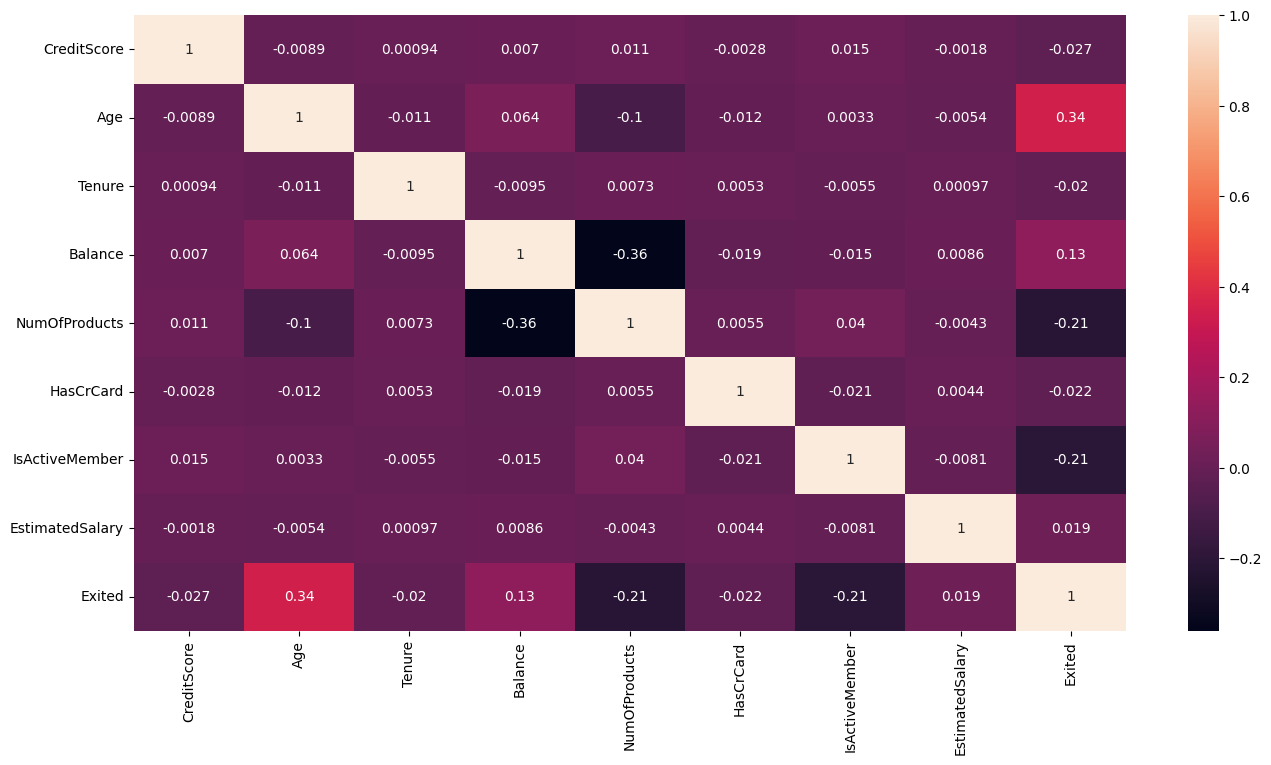

In [195]:
num_col = train_df.drop(["CustomerId"], axis=1).select_dtypes(np.number)
plt.figure(figsize=(16,8))
sns.heatmap(data=num_col.corr(), annot=True)

In [196]:
train_df.drop(["CustomerId", "Surname"], axis=1, inplace=True)

As we use cat xgboost and lightbgm is not effected too effect by skewness of data and outlier 

Feature Engineering and Transformation

Imbalance in ratio to leave bank is uneven with age so we make bin in age that model can better understand the relation

In [197]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering (BaseException, TransformerMixin) :

    def fit (self, X, y=None) :
        return self

    def transform(self, X, y=None) :
        X["Age_Bins"] = pd.cut(x=X["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
        return X



In [198]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [199]:
encoding = ColumnTransformer([
    ("Ordinal", OneHotEncoder(drop='first', sparse=False), ["Gender", "Geography"])
], verbose_feature_names_out=False,
remainder='passthrough'
).set_output(transform='pandas')



In [200]:
num_col = train_df.select_dtypes(np.number).columns.tolist()
num_col.append("Age_Bins")
num_col.remove("Exited")


scaling = ColumnTransformer([
    ("StandardScaler", MinMaxScaler(),num_col)
],
remainder='passthrough', 
verbose_feature_names_out=False
).set_output(transform='pandas')

In [201]:

class DropFeature(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.drop([ "Surname"], axis=1)
        return X_transformed

In [202]:
test_df = pd.read_csv('data/test.csv')

<Axes: title={'center': 'Heat map of Missing values in test data'}>

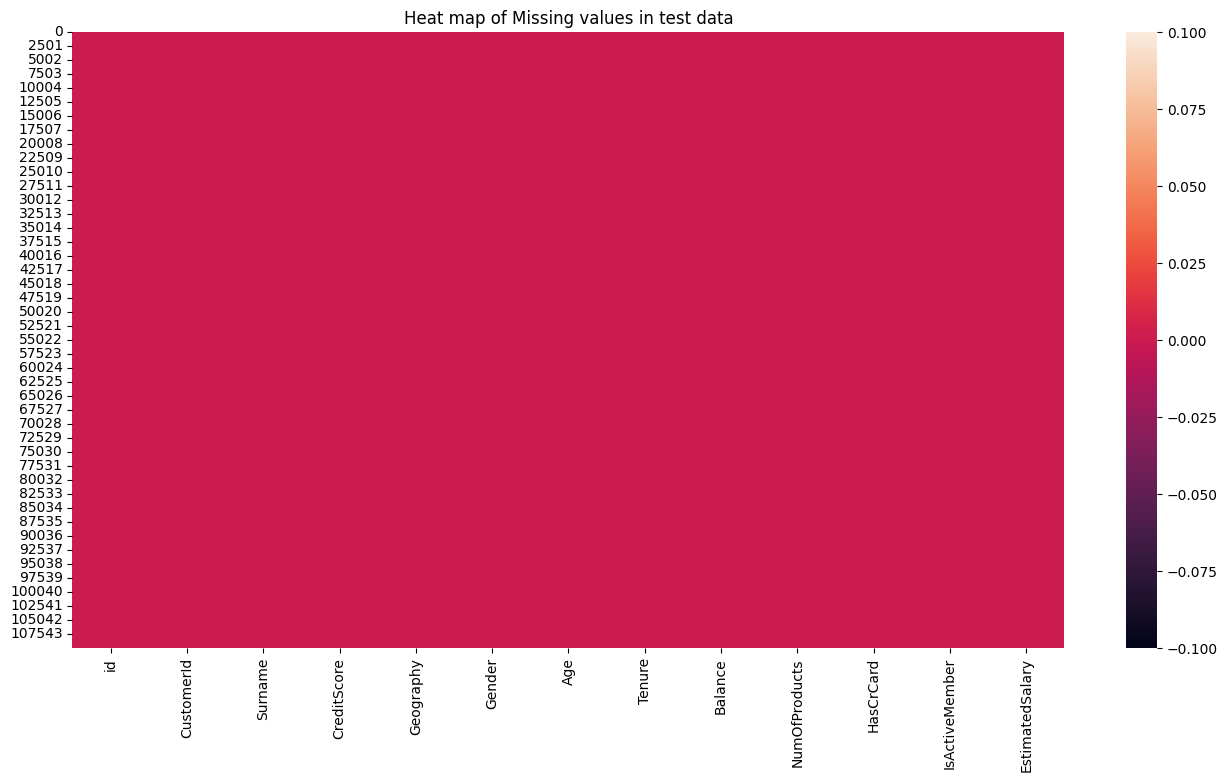

In [203]:
plt.figure(figsize=(16, 8))
plt.title("Heat map of Missing values in test data")
sns.heatmap(test_df.isna())

In [204]:
from sklearn.pipeline import Pipeline

In [205]:
pipe = Pipeline([
    ("FeatureEngineering", FeatureEngineering()),
    ("Encoding", encoding),
    ("Scaling", scaling) ,   
])

In [206]:
from sklearn.model_selection import train_test_split

inputs = train_df.drop(["Exited"], axis=1)
target = train_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(inputs, target, random_state=42, test_size=0.25)

In [207]:
X_train
encoding.fit_transform(X_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_Male,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,
121245,1.0,1.0,0.0,651,55.0,7,111589.33,1,1.0,0.0,173464.43
117612,0.0,0.0,0.0,731,39.0,2,0.00,1,1.0,0.0,74850.93
44707,1.0,1.0,0.0,585,48.0,5,127864.40,1,1.0,0.0,162223.67
119360,0.0,0.0,0.0,729,45.0,2,0.00,1,1.0,1.0,175071.29
159721,0.0,0.0,0.0,719,31.0,1,109019.65,1,0.0,0.0,156887.06
...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,1.0,0.0,668,45.0,6,104576.80,1,1.0,0.0,113081.42
103694,1.0,0.0,0.0,751,43.0,7,0.00,2,1.0,0.0,88866.39
131932,0.0,0.0,0.0,753,39.0,7,0.00,2,1.0,0.0,167973.63


In [208]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [209]:
# X_train.drop(['Age_Bins'], axis=1, inplace=True)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Bins,Gender_Male,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,
121245,0.602,0.500000,0.7,0.444760,0.000000,1.0,0.0,0.867347,0.571429,1.0,1.0,0.0
117612,0.762,0.283784,0.2,0.000000,0.000000,1.0,0.0,0.374232,0.285714,0.0,0.0,0.0
44707,0.470,0.405405,0.5,0.509627,0.000000,1.0,0.0,0.811138,0.428571,1.0,1.0,0.0
119360,0.758,0.364865,0.2,0.000000,0.000000,1.0,1.0,0.875382,0.428571,0.0,0.0,0.0
159721,0.738,0.175676,0.1,0.434518,0.000000,0.0,0.0,0.784452,0.285714,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.636,0.364865,0.6,0.416810,0.000000,1.0,0.0,0.565403,0.428571,1.0,1.0,0.0
103694,0.802,0.337838,0.7,0.000000,0.333333,1.0,0.0,0.444316,0.428571,1.0,0.0,0.0
131932,0.806,0.283784,0.7,0.000000,0.333333,1.0,0.0,0.839890,0.285714,0.0,0.0,0.0


In [210]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Bins,Gender_Male,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,
33042,0.896,0.175676,0.8,0.406842,0.000000,1.0,0.0,0.397867,0.285714,0.0,0.0,0.0
36330,0.558,0.108108,0.6,0.000000,0.333333,1.0,0.0,0.190914,0.142857,1.0,0.0,0.0
59446,0.430,0.283784,0.7,0.459004,0.666667,1.0,0.0,0.345238,0.285714,1.0,0.0,0.0
92278,0.606,0.500000,0.2,0.280049,0.000000,0.0,0.0,0.311710,0.571429,1.0,0.0,1.0
146750,0.414,0.175676,0.6,0.424859,0.000000,1.0,0.0,0.456515,0.285714,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146120,0.604,0.243243,0.3,0.000000,0.000000,1.0,0.0,0.699806,0.285714,1.0,0.0,0.0
77464,0.514,0.256757,0.1,0.549391,0.000000,1.0,1.0,0.466590,0.285714,1.0,0.0,0.0
56761,0.600,0.067568,0.4,0.374301,0.000000,1.0,0.0,0.345252,0.142857,1.0,1.0,0.0


In [211]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

In [212]:
from sklearn.metrics import roc_auc_score, roc_curve
import plotly.graph_objects as go

In [213]:
from sklearn.model_selection import GridSearchCV

In [214]:
def Modeling(X_train, X_test, y_train, y_test) :

    models = {
        # "Logistic": LogisticRegression(max_iter=2000),
        "XGB": XGBClassifier(random_state=42, n_estimators=100),
        "LGBM": LGBMClassifier(random_state=42),
        # "svc": SVC(),
        "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    }

    xgb_params = {
        'learning_rate': [0.1, 0.05],
        # 'n_estimators': [100],
        'max_depth': [6, 9],
        # 'min_child_weight': [1, 5, 10],
        # 'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bytree': [0.6, 0.8, 1.0]
    }

    lgbm_params = {
        'learning_rate': [0.1, 0.05],
        'num_leaves': [31, 35],
        'max_depth': [ 6, 7],
        # 'min_child_samples': [30, 60, 100],
        # 'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bytree': [0.6, 0.8, 1.0]
    }

    svc_params = {
        'C': [1, 10],
        # 'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        # 'class_weight': [None, 'balanced']
    }

    cat_params = {
        'learning_rate': [0.1, 0.05],
        # 'iterations': [ 100, 200],
        'depth': [6, 7],
        # 'l2_leaf_reg': [1, 5, 10],
        # 'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bylevel': [0.6, 0.8, 1.0]
    }

    param_array = [xgb_params, lgbm_params, cat_params]
    i = 0
    model_curves = {}
    for key, model in models.items() :
        grid_search = GridSearchCV(estimator=model, param_grid=param_array[i], scoring='roc_auc', cv=5)
        grid_search.fit(X_train, y_train)
        print("Model is:  ", key)
        print()
        print()
        best_params = grid_search.best_params_
        print("Best Params are:   ",best_params)
        y_pred = grid_search.predict_proba(X_test)[:,1]
        roc_score = roc_auc_score(y_test, y_pred)
        print("ROC Socre is :   ",roc_score)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        model_curves[key] = [fpr, tpr, thresholds]
        index = np.argmax(tpr - fpr)
        best_threshold = thresholds[index]
        print("Best Threshold is:  ", best_threshold)
        plt.figure(figsize=(16, 8))
        plt.plot(fpr, tpr)
        plt.plot([0,1], [0,1])
        plt.show()
        i += 1




In [215]:
# Modeling(X_train, X_test, y_train, y_test)

In [216]:
def HyperparameterTuning(modelname, **params) :
    if (modelname == "lgbm") :
        model = LGBMClassifier(random_state=42, **params)
    elif modelname == "xgb" :
        model = XGBClassifier(random_state=42, **params)
    elif modelname == "cat" :
        model = CatBoostClassifier(random_state=42, verbose=0, **params)
    
    
    print(params)
    print(modelname)
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    optimat_threshold = np.argmax(tpr - fpr)
    print("Optimal Threshold: ", thresholds[optimat_threshold])
    roc_score = roc_auc_score(y_test, pred)
    plt.figure(figsize=(16,8))
    print("ROC score: ", roc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.show()
    return fpr, tpr, thresholds

{'learning_rate': 0.1, 'max_depth': 6, 'num_leaves': 35}
lgbm
[LightGBM] [Info] Number of positive: 26300, number of negative: 97475
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 123775, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212482 -> initscore=-1.310027
[LightGBM] [Info] Start training from score -1.310027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Optimal Threshold:  0.1939010282117965
ROC score:  0.8905381120845494


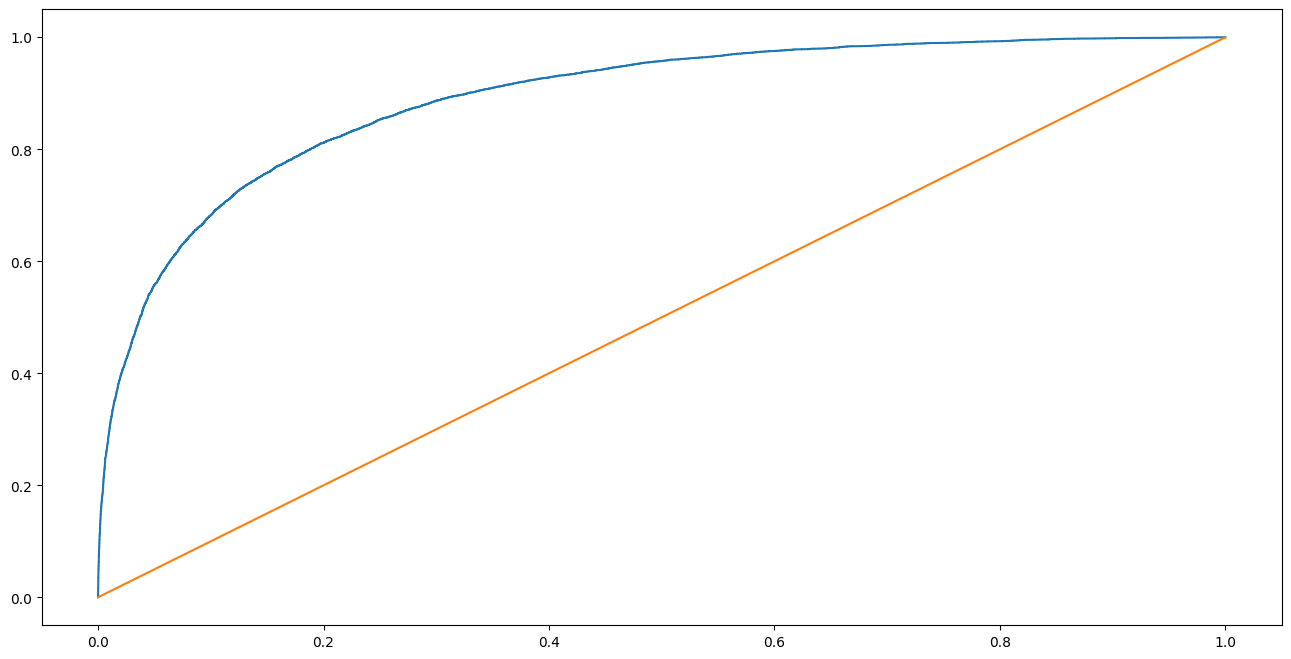

In [217]:
lbgm_fpr, lbgm_tpr, lbgm_threshold = HyperparameterTuning("lgbm", learning_rate=0.1, max_depth=6, num_leaves=35)

{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 1, 'gamma': 0.1}
xgb
Optimal Threshold:  0.18961842
ROC score:  0.8900988416062343


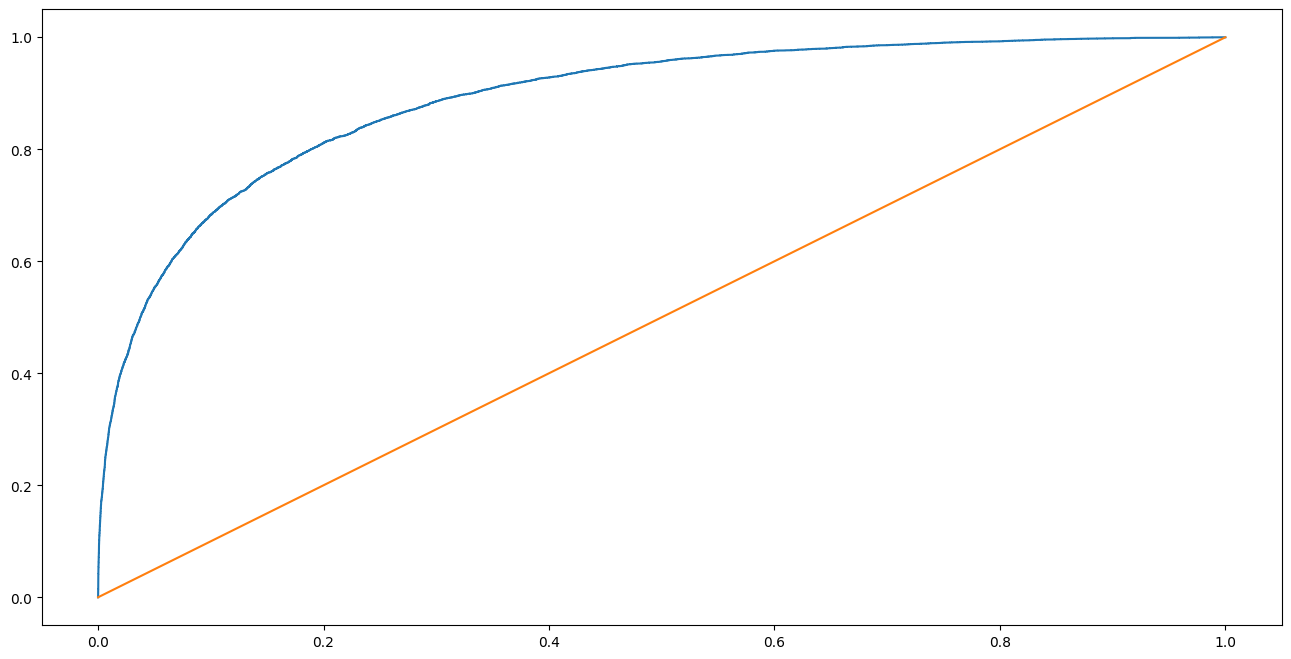

In [218]:
xgb_fpr, xgb_tpr, xgb_threshold = HyperparameterTuning("xgb", learning_rate=0.1,  max_depth=7, subsample=0.8, colsample_bytree=1, gamma=0.1)

{'learning_rate': 0.05, 'max_depth': 6}
cat
Optimal Threshold:  0.20758984471984024
ROC score:  0.890950100194334


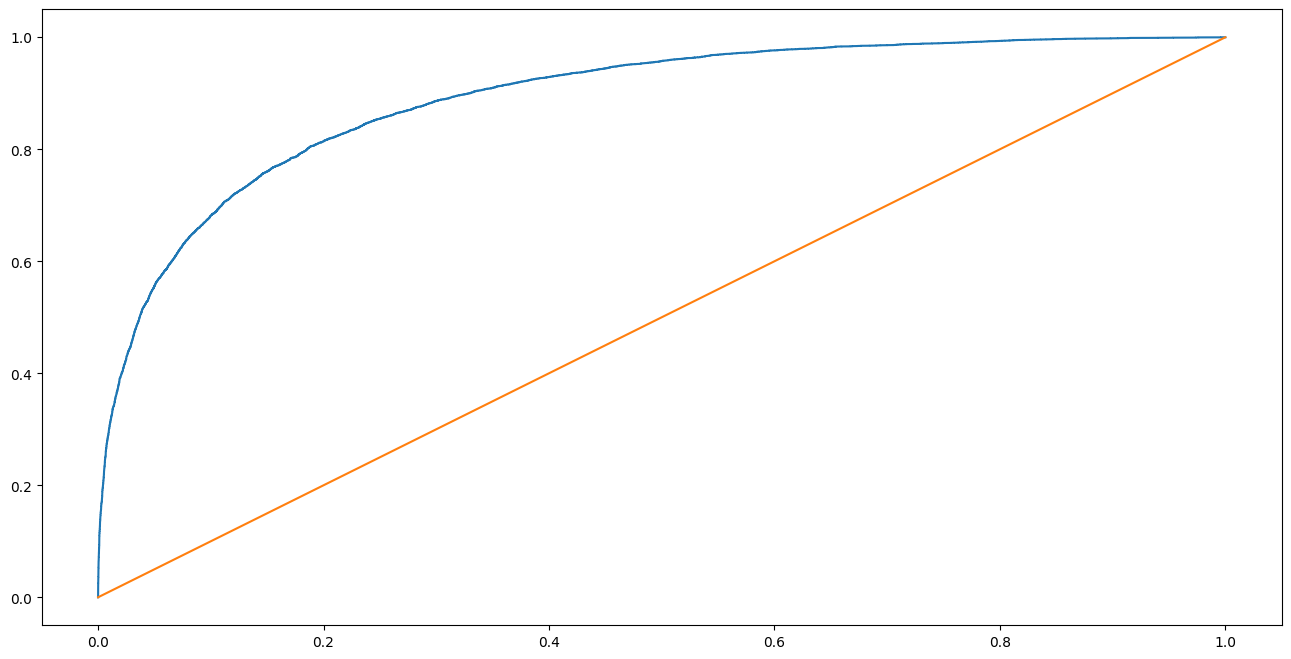

In [219]:
cat_fpr, cat_tpr, cat_threshold = HyperparameterTuning("cat", learning_rate=0.05,  max_depth=6)
# 'learning_rate': [0.1, 0.05],
        # 'iterations': [ 100, 200],
        # 'depth': [6, 7],
        # 'l2_leaf_reg': [1, 5, 10],
        # 'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bylevel': [0.6, 0.8, 1.0]

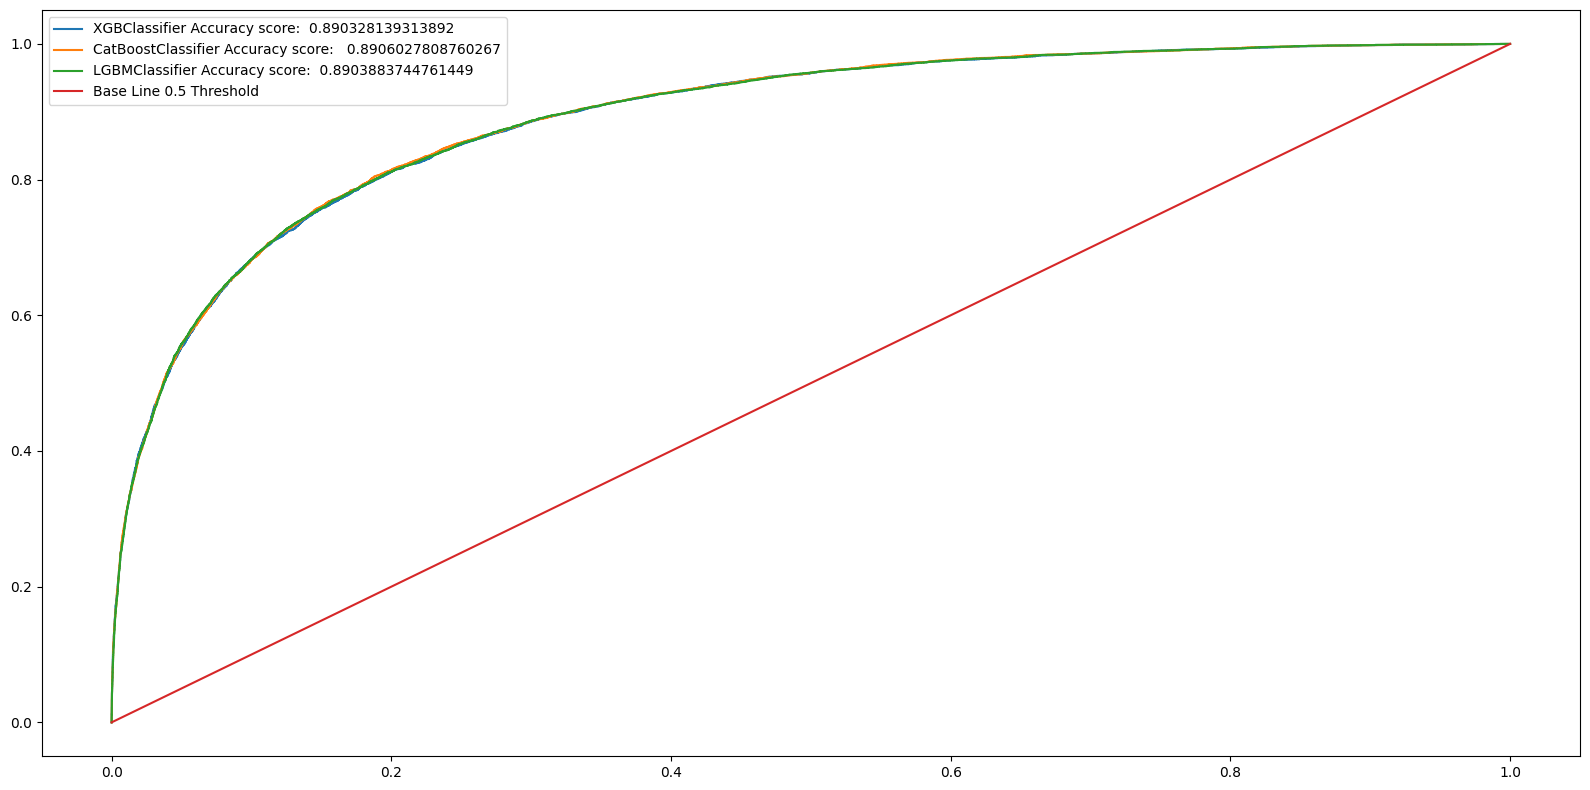

In [220]:
plt.figure(figsize=(16, 8))
plt.plot(xgb_fpr, xgb_tpr, label="XGBClassifier Accuracy score:  0.890328139313892")
plt.plot(cat_fpr, cat_tpr, label="CatBoostClassifier Accuracy score:   0.8906027808760267") 
plt.plot(lbgm_fpr, lbgm_tpr, label="LGBMClassifier Accuracy score:  0.8903883744761449", )
plt.plot([0,1], label="Base Line 0.5 Threshold")    

plt.legend()  
plt.tight_layout()
plt.show()

In [221]:
test_df.drop(["CustomerId",	"Surname", "id"], axis=1, inplace=True)



In [222]:
test_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [223]:
inputs = pipe.fit_transform(inputs)
test_df = pipe.transform(test_df)


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [224]:
inputs

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Bins,Gender_Male,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,
0,0.636,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,0.285714,1.0,0.0,0.0
1,0.554,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,0.285714,1.0,0.0,0.0
2,0.656,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,0.285714,1.0,0.0,0.0
3,0.462,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,0.285714,1.0,0.0,0.0
4,0.732,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0.285714,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.634,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179,0.285714,0.0,0.0,1.0
165030,0.884,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177,0.285714,1.0,0.0,0.0
165031,0.430,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151,0.285714,1.0,0.0,0.0


In [225]:
test_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Bins,Gender_Male,Geography_Germany,Geography_Spain
0,0.472,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903,0.142857,0.0,0.0,0.0
1,0.666,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723,0.428571,0.0,0.0,0.0
2,0.612,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419,0.285714,0.0,0.0,0.0
3,0.662,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654,0.285714,1.0,0.0,0.0
4,0.804,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164,0.285714,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.440,0.148649,0.7,0.462737,0.000000,1.0,1.0,0.740451,0.142857,1.0,0.0,1.0
110019,0.450,0.243243,0.4,0.709581,0.000000,1.0,1.0,0.210871,0.285714,0.0,0.0,0.0
110020,0.724,0.175676,0.2,0.000000,0.333333,1.0,0.0,0.081387,0.285714,1.0,0.0,0.0
110021,0.718,0.189189,0.3,0.000000,0.000000,1.0,1.0,0.794101,0.285714,0.0,0.0,0.0


In [226]:
inputs

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Bins,Gender_Male,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,
0,0.636,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,0.285714,1.0,0.0,0.0
1,0.554,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,0.285714,1.0,0.0,0.0
2,0.656,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,0.285714,1.0,0.0,0.0
3,0.462,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,0.285714,1.0,0.0,0.0
4,0.732,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0.285714,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.634,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179,0.285714,0.0,0.0,1.0
165030,0.884,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177,0.285714,1.0,0.0,0.0
165031,0.430,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151,0.285714,1.0,0.0,0.0


In [227]:
lgbm_params = {'learning_rate': 0.09, 'max_depth': 6, 'num_leaves': 35}
xgb_params = {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 1, 'gamma': 0.1}
cat_params = {'learning_rate': 0.05, 'max_depth': 6,  'verbose': 0}

In [228]:
xgb_model = XGBClassifier(random_state = 42, **xgb_params)
lgbm_model = LGBMClassifier(random_state = 42, **lgbm_params)
cat_model = CatBoostClassifier(random_state=42, **cat_params)


In [229]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict_proba(X_test)[:,1]
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict_proba(X_test)[:,1]
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict_proba(X_test)[:,1]


[LightGBM] [Info] Number of positive: 26300, number of negative: 97475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 123775, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212482 -> initscore=-1.310027
[LightGBM] [Info] Start training from score -1.310027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [230]:
# Find Best Combination of Models
arr_combinations = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.90, 1]
pred_arr = [xgb_pred, lgbm_pred, cat_pred]

best_combination = None
best_score = 0.0

for i in range(len(arr_combinations)):
    for j in range(len(arr_combinations)):
        # Calculate the ratio for the third model
        k = 1 - arr_combinations[i] - arr_combinations[j]

        # Check if the combination ratios are valid (sum to 1)
        if k >= 0:
            # Calculate weighted average of predictions
            combined_pred = (
                pred_arr[0] * arr_combinations[i] +
                pred_arr[1] * arr_combinations[j] +
                pred_arr[2] * k
            )
            
            # Use the combined prediction to evaluate performance (you can use your own metric)
            # For example, you can use roc_auc_score, accuracy, etc.
            combined_score = roc_auc_score(y_test, combined_pred)
            
            # Check if the current combination has a higher score
            if combined_score > best_score:
                best_score = combined_score
                best_combination = (arr_combinations[i], arr_combinations[j], k)

print("Best Combination:", best_combination)
print("Best Score:", best_score)


Best Combination: (0.15, 0.3, 0.55)
Best Score: 0.8913080602227802


In [231]:
xgb_model.fit(inputs, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [232]:
lgbm_model.fit(inputs, target)

[LightGBM] [Info] Number of positive: 34921, number of negative: 130113
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.392368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 165034, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211599 -> initscore=-1.315315
[LightGBM] [Info] Start training from score -1.315315


LGBMClassifier(learning_rate=0.09, max_depth=6, num_leaves=35, random_state=42)

In [233]:
cat_model.fit(inputs, target)

In [234]:
xgb_preds = xgb_model.predict_proba(test_df)[:, 1]

In [235]:
lgbm_preds = lgbm_model.predict_proba(test_df)[:, 1]

In [236]:
cat_preds = cat_model.predict_proba(test_df)[:,1]

In [261]:
final_pred = cat_preds

In [262]:
final_pred.shape

(110023,)

In [263]:
submission = pd.read_csv('data/sample_submission.csv')


In [264]:
submission["Exited"] = final_pred

In [265]:
submission.head()

,id,Exited
0,165034,0.027791
1,165035,0.832099
2,165036,0.022603
3,165037,0.229790
4,165038,0.380303


In [266]:
submission.to_csv("data/prediction.csv", index=False)